# PRIMEIRA AVALIAÇÃO DE ECONOMETRIA

## Importação das Bibliotecas

In [2]:
# Análise de dados básica

import pandas as pd
import numpy as np

# Visualização

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Econometria

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

# Estatística

from scipy import stats

## Configuração do Display

In [3]:
# O pandas foi configurado para mostrar todas as colunas e as 100 primeiras linhas

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 10)     

## Carregamento da Base de Dados

In [4]:
# O caminho do arquivo (base de dados) foi guardado em uma variável

caminho_arquivo = "/home/ph-padrim/Área de trabalho/Trabalho de Econometria/rais_firma_2021_aula.csv"

# O arquivo CSV foi transformado em um dataframe

df = pd.read_csv(caminho_arquivo, encoding='UTF-8')  

# Criando a coluna com o quadrado da idade_med

df['idade_med_quadrado'] = df['idade_med'] ** 2

# Criar interação entre sexo e raça/cor (se forem numéricas). Se forem categóricas, primeiro crie dummies

df['sexo_raca_interacao'] = df['sexo_med'] * df['raca_cor_med']

# Versão alternativa com get_dummies

dummies = pd.get_dummies(df['nivel_tec'], prefix='nivel_tec')
dummies = dummies[[f'nivel_tec_{i}' for i in range(1, 6)]]  # Remove o nível 0
df = pd.concat([df, dummies], axis=1)

# Convertendo as dummies em inteiros

for nivel in range(1, 6):
    df[f'nivel_tec_{nivel}'] = (df['nivel_tec'] == nivel).astype(int)

## Display Resumido do Dataframe

In [5]:
# Mostra as 10 primeiras linhas do dataframe

display(df) 

,sexo_med,raca_cor_med,tempo_emprego_med,idade_med,remun_med_real_med,hb_med,hn_med,mb_med,mn_med,envelhecidos_med,adultos_med,jovens_med,ate_fundamental_med,superior_med,rotatividade_med,mismatchover_med,mismatchunder_med,mismatchnull_med,tempo_emprego_a1_med,tempo_emprego_2a5_med,tempo_emprego_6mais_med,sal_hora_med,hierq_cbo_a_med,hierq_cbo_b_med,hierq_cbo_c_med,hierq_cbo_d_med,hierq_cbo_e_med,hierq_cbo_f_med,hierq_cbo_g_med,hierq_cbo_h_med,hierq_cbo_i_med,hierq_cbo_j_med,jornmeno30_med,sal_hora_dp,produtividade,data_abertura,data_encerramento,municipio,natureza_juridica,qtd_vinc_atv,ibge_subset,ind_atv_ano,cnae_20,nivel_tec,tamanho,idade,idade_med_quadrado,sexo_raca_interacao,nivel_tec_1,nivel_tec_2,nivel_tec_3,nivel_tec_4,nivel_tec_5
0,0.00,0.00,57.900,54.000000,2398.300,1.000000,0.00,0.000000,0.0,0.000000,1.000000,0.0,1.00,0.0,0.0,1.00,0.0,0.00,0.00,1.00,0.0,13.626705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.0,NaN,54.506818,0,0,315250,4081,1,25,1,1,1,2,NaN,2916.000000,0.0000,1,0,0,0,0
1,0.20,0.50,7.500,35.200000,2289.444,0.333333,0.50,0.166667,0.0,0.200000,0.100000,0.7,0.20,0.0,0.1,0.50,0.0,0.50,0.90,0.10,0.0,13.008205,0.0,0.0,0.2,0.3,0.1,0.0,0.0,0.30,0.10,0.0,0.0,5.695288,52.032818,0,0,314980,4120,5,25,1,1,1,2,NaN,1239.040000,0.1000,1,0,0,0,0
2,1.00,0.00,103.900,40.000000,1130.550,0.000000,0.00,1.000000,0.0,0.000000,1.000000,0.0,0.00,0.0,0.0,0.00,0.0,1.00,0.00,0.00,1.0,7.065938,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.0,0.0,NaN,28.263750,0,0,261330,4081,1,19,1,69,2,2,NaN,1600.000000,0.0000,0,1,0,0,0
3,0.00,0.00,57.200,64.000000,1003.750,1.000000,0.00,0.000000,0.0,1.000000,0.000000,0.0,0.00,0.0,0.0,0.00,0.0,1.00,0.00,1.00,0.0,5.703125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.0,NaN,22.812500,0,0,314810,4120,0,25,1,1,1,2,NaN,4096.000000,0.0000,1,0,0,0,0
4,0.25,0.25,13.825,33.500000,1352.515,0.500000,0.25,0.250000,0.0,0.000000,0.500000,0.5,0.25,0.0,0.0,0.25,0.0,0.75,0.75,0.25,0.0,7.684744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.25,0.0,0.0,1.721219,30.738977,0,0,310380,4081,3,25,1,1,1,2,NaN,1122.250000,0.0625,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575868,1.00,0.00,160.900,61.000000,1514.940,0.000000,0.00,1.000000,0.0,1.000000,0.000000,0.0,1.00,0.0,0.0,1.00,0.0,0.00,0.00,0.00,1.0,8.607614,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.0,0.0,NaN,34.430455,0,0,521150,4120,1,25,1,1,1,2,NaN,3721.000000,0.0000,1,0,0,0,0
2575869,0.00,0.00,40.900,40.000000,2075.000,1.000000,0.00,0.000000,0.0,0.000000,1.000000,0.0,1.00,0.0,0.0,1.00,0.0,0.00,0.00,1.00,0.0,11.789773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.0,NaN,47.159091,0,0,316960,4120,1,25,1,1,1,2,NaN,1600.000000,0.0000,1,0,0,0,0
2575870,0.00,1.00,46.500,61.000000,1080.440,0.000000,1.00,0.000000,0.0,1.000000,0.000000,0.0,1.00,0.0,0.0,1.00,0.0,0.00,0.00,1.00,0.0,6.138864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.0,NaN,24.555455,0,0,311430,4120,0,25,1,1,1,2,NaN,3721.000000,0.0000,1,0,0,0,0
2575871,0.00,0.00,196.900,52.333333,1916.540,1.000000,0.00,0.000000,0.0,0.333333,0.666667,0.0,1.00,0.0,0.0,1.00,0.0,0.00,0.00,0.00,1.0,10.889432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.0,1.097719,43.557727,0,0,411700,4120,3,25,1,1,1,2,NaN,2738.777778,0.0000,1,0,0,0,0


## Análise Exploratória

### Descrição das Variáveis

Descrição da variável Y (remuneração média real da firma)
 
count    2.575873e+06
mean     1.694868e+03
std      1.305140e+03
min      0.000000e+00
25%      1.184857e+03
50%      1.455021e+03
75%      1.863400e+03
max      1.457806e+05
Name: remun_med_real_med, dtype: float64


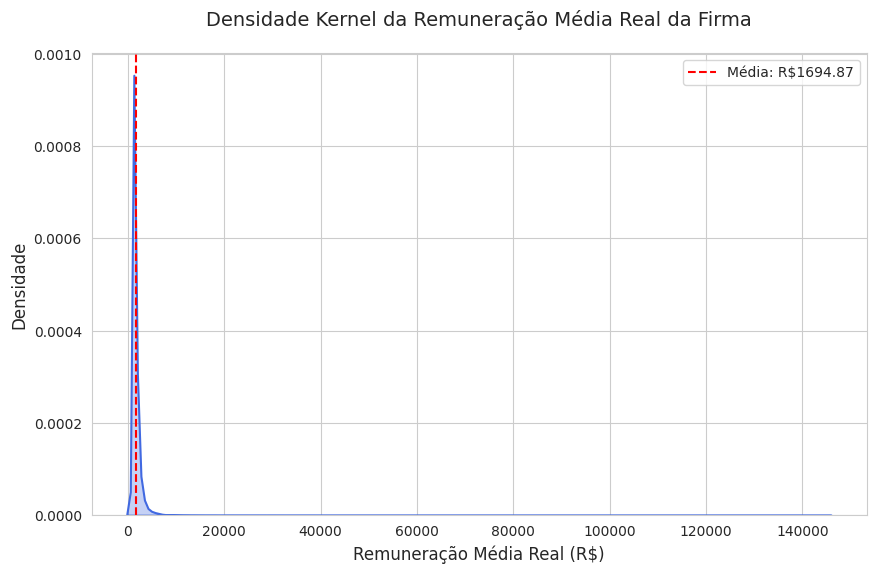

In [6]:
# Mostra uma descrição da variável dependente utilizada nas regressões ('remun_med_real_med'), isto é, a variável remuneração média da firma

print('===========================================================')
print('Descrição da variável Y (remuneração média real da firma)')
print(' ' \
'')
print(df['remun_med_real_med'].describe())
print('==========================================================')

# 1) Plotando o gráfico de densidade kernel da variável Y (Remuneração média real da firma)

# 1.1) Configurar o estilo do gráfico

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# 1.2) Criar o gráfico de densidade Kernel (KDE)

sns.kdeplot(
    data=df,
    x='remun_med_real_med',
    color='royalblue',
    fill=True,
    alpha=0.3,  # Transparência do preenchimento
    linewidth=1.5  # Espessura da linha
)

# 1.3) Adicionar título e labels

plt.title('Densidade Kernel da Remuneração Média Real da Firma', fontsize=14, pad=20)
plt.xlabel('Remuneração Média Real (R$)', fontsize=12)
plt.ylabel('Densidade', fontsize=12)

# 1.4) Adicionar linha da média

media = df['remun_med_real_med'].mean()
plt.axvline(media, color='red', linestyle='--', label=f'Média: R${media:.2f}')
plt.legend()

# 1.5) Mostrar o gráfico

plt.show()


Descrição da variável X1 (idade média na firma)
 
count    2.575873e+06
mean     3.575006e+01
std      9.192819e+00
min      1.800000e+01
25%      2.900000e+01
50%      3.466667e+01
75%      4.100000e+01
max      7.500000e+01
Name: idade_med, dtype: float64


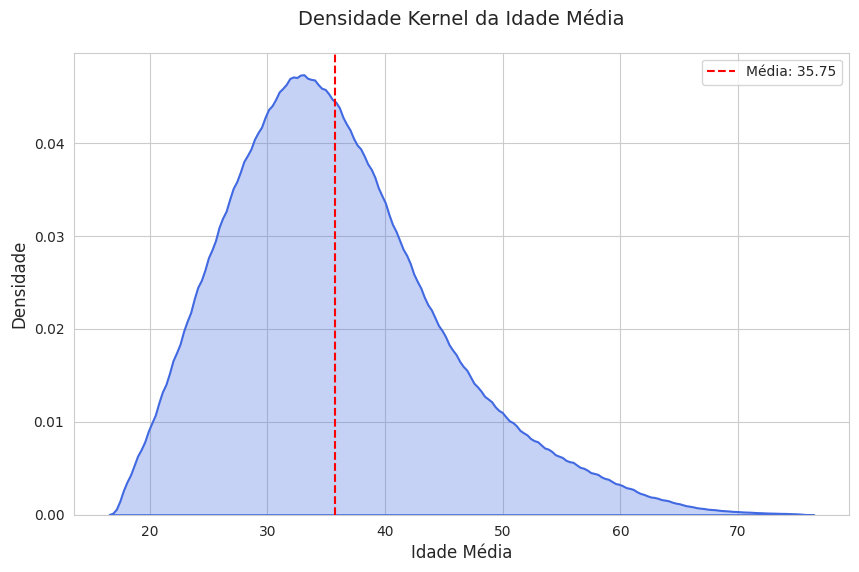

In [7]:

# Mostra uma descrição da variável independente utilizada nas regressões ('idade_med'), isto é, a idade média dos trabalhadores da firma

print('================================================')
print('Descrição da variável X1 (idade média na firma)')
print(' ' \
'')
print(df['idade_med'].describe())
print('===============================================')

# 1) Platando o gráfico de densidade kernel da variável X1 (Idade média)

# 1.1) Configurar o estilo do gráfico

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# 1.2) Criar o gráfico de densidade Kernel (KDE)

sns.kdeplot(
    data=df,
    x='idade_med',
    color='royalblue',
    fill=True,
    alpha=0.3,  # Transparência do preenchimento
    linewidth=1.5  # Espessura da linha
)

# 1.3) adicionar título e labels

plt.title('Densidade Kernel da Idade Média', fontsize=14, pad=20)
plt.xlabel('Idade Média', fontsize=12)
plt.ylabel('Densidade', fontsize=12)

# 1.4) Adicionar linha da média

media = df['idade_med'].mean()
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.legend()

# 1.5) Mostrar o gráfico

plt.show()




Descrição da variável X2 (proporção de ensino superior ou mais na firma)
 
count    2.575873e+06
mean     1.033806e-01
std      2.336733e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.882353e-02
max      1.000000e+00
Name: superior_med, dtype: float64


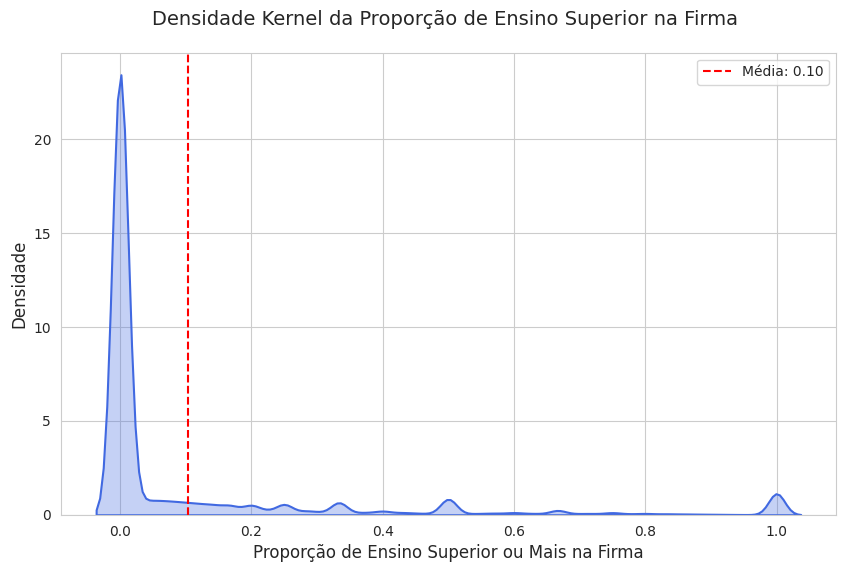

In [8]:
# Mostra uma descrição da variável independente utilizada nas regressões ('superior_med'), isto é, a proporção de pessoas com o ensino superior ou mais na firma

print('========================================================================')
print('Descrição da variável X2 (proporção de ensino superior ou mais na firma)')
print(' ' \
'')
print(df['superior_med'].describe())
print('=======================================================================')

# 1) Plotando o gráfico de densidade kernel da variável Y (Proporção de ensino superior ou mais na firma)

# 1.1) Configurar o estilo do gráfico

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# 1.2) Criar o gráfico de densidade Kernel (KDE)

sns.kdeplot(
    data=df,
    x='superior_med',
    color='royalblue',
    fill=True,
    alpha=0.3,  # Transparência do preenchimento
    linewidth=1.5  # Espessura da linha
)

# 1.3) Adicionar título e labels

plt.title('Densidade Kernel da Proporção de Ensino Superior na Firma ', fontsize=14, pad=20)
plt.xlabel('Proporção de Ensino Superior ou Mais na Firma', fontsize=12)
plt.ylabel('Densidade', fontsize=12)

# 1.4) Adicionar linha da média

media = df['superior_med'].mean()
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.legend()

# 1.5) Mostrar o gráfico

plt.show()

Descrição da variável X3 (proporção de mulheres na firma)
 
count    2.575873e+06
mean     4.634875e-01
std      4.002703e-01
min      0.000000e+00
25%      0.000000e+00
50%      4.461538e-01
75%      9.821429e-01
max      1.000000e+00
Name: sexo_med, dtype: float64


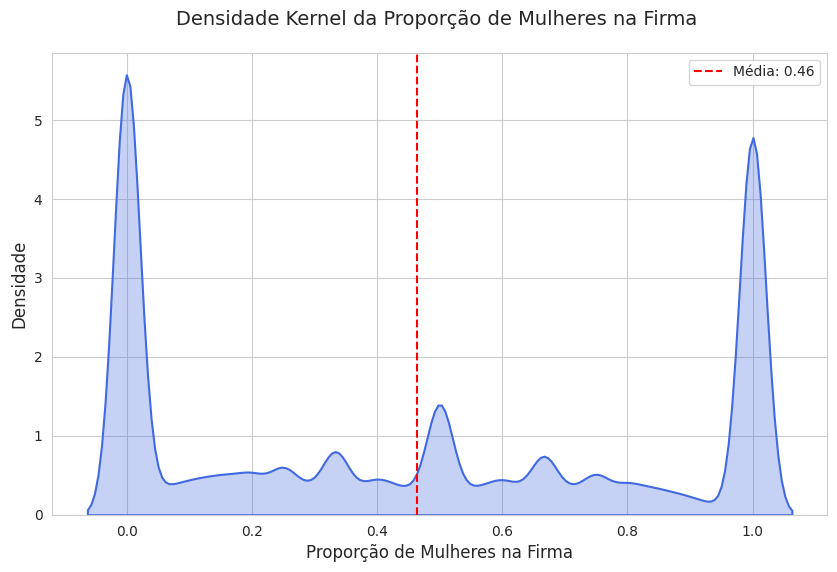

In [9]:
# Mostra uma descrição da variável independente utilizada nas regressões ('sexo_med')

print('========================================================================')
print('Descrição da variável X3 (proporção de mulheres na firma)')
print(' ' \
'')
print(df['sexo_med'].describe())
print('=======================================================================')

# Platando o gráfico de densidade kernel da variável Y (Proporção de ensino superior ou mais na firma)

# Configurar o estilo do gráfico

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Criar o gráfico de densidade Kernel (KDE)

sns.kdeplot(
    data=df,
    x='sexo_med',
    color='royalblue',
    fill=True,
    alpha=0.3,  # Transparência do preenchimento
    linewidth=1.5  # Espessura da linha
)

# Adicionar título e labels
plt.title('Densidade Kernel da Proporção de Mulheres na Firma ', fontsize=14, pad=20)
plt.xlabel('Proporção de Mulheres na Firma', fontsize=12)
plt.ylabel('Densidade', fontsize=12)

# Adicionar linha da média
media = df['sexo_med'].mean()
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.legend()

# Mostrar o gráfico
plt.show()

Descrição da variável X4 (proporção de negros na firma)
 
count    2.200281e+06
mean     4.121330e-01
std      4.146033e-01
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e-01
75%      9.189189e-01
max      1.000000e+00
Name: raca_cor_med, dtype: float64


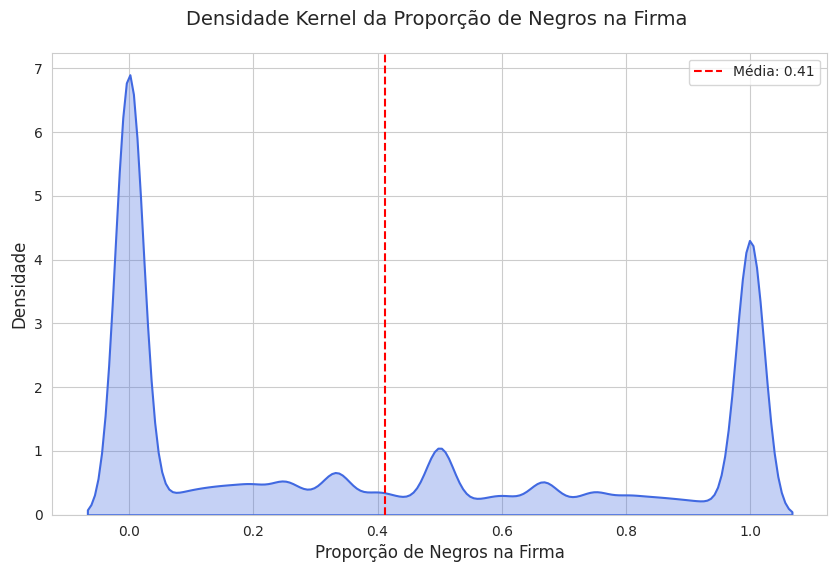

In [10]:
# Mostra uma descrição da variável dependente utilizada nas regressões ('raca_cor_med')

print('========================================================================')
print('Descrição da variável X4 (proporção de negros na firma)')
print(' ' \
'')
print(df['raca_cor_med'].describe())
print('=======================================================================')

# Configurar o estilo do gráfico

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Criar o gráfico de densidade Kernel (KDE)

sns.kdeplot(
    data=df,
    x='raca_cor_med',
    color='royalblue',
    fill=True,
    alpha=0.3,  # Transparência do preenchimento
    linewidth=1.5  # Espessura da linha
)

# Adicionar título e labels
plt.title('Densidade Kernel da Proporção de Negros na Firma ', fontsize=14, pad=20)
plt.xlabel('Proporção de Negros na Firma', fontsize=12)
plt.ylabel('Densidade', fontsize=12)

# Adicionar linha da média
media = df['raca_cor_med'].mean()
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.legend()

# Mostrar o gráfico
plt.show()

Descrição da variável X5 (nivel técnico na firma)
 
count    2.575873e+06
mean     7.851090e-01
std      8.622532e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      5.000000e+00
Name: nivel_tec, dtype: float64


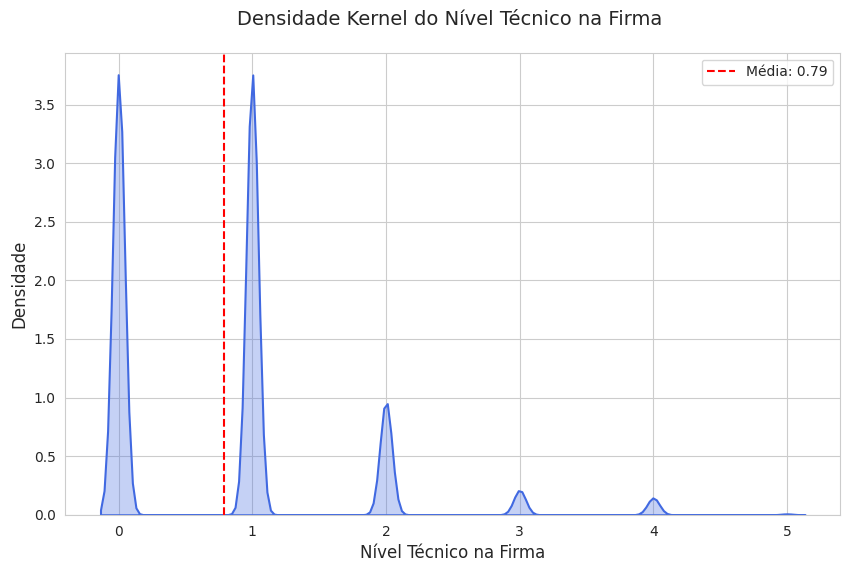

In [11]:
# Mostra uma descrição da variável dependente utilizada nas regressões ('nivel_tec')

print('========================================================================')
print('Descrição da variável X5 (nivel técnico na firma)')
print(' ' \
'')
print(df['nivel_tec'].describe())
print('=======================================================================')

# Configurar o estilo do gráfico

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Criar o gráfico de densidade Kernel (KDE)

sns.kdeplot(
    data=df,
    x='nivel_tec',
    color='royalblue',
    fill=True,
    alpha=0.3,  # Transparência do preenchimento
    linewidth=1.5  # Espessura da linha
)

# Adicionar título e labels
plt.title('Densidade Kernel do Nível Técnico na Firma ', fontsize=14, pad=20)
plt.xlabel('Nível Técnico na Firma', fontsize=12)
plt.ylabel('Densidade', fontsize=12)

# Adicionar linha da média
media = df['nivel_tec'].mean()
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.legend()

# Mostrar o gráfico
plt.show()

### Analisando modelos

#### remuneção média real da firma = const + proporção de ensino superior ou mais


=== VIF ===
const: VIF = 1.195731233437946
superior_med: VIF = 0.9999999999996219
=== Teste de Breusch-Pagan ===
Estatística LM: 18913.898703080624
p-valor: 0.0
F-estatística: 19053.790552023995
F p-valor: 0.0
                            OLS Regression Results                            
Dep. Variable:     remun_med_real_med   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                 3.884e+04
Date:                Sun, 08 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:02:07   Log-Likelihood:            -2.1989e+07
No. Observations:             2575873   AIC:                         4.398e+07
Df Residuals:                 2575871   BIC:                         4.398e+07
Df Model:                           1                                         
Covariance Type:                  HC3                                         

/home/ph-padrim/Área de trabalho/Trabalho de Econometria/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


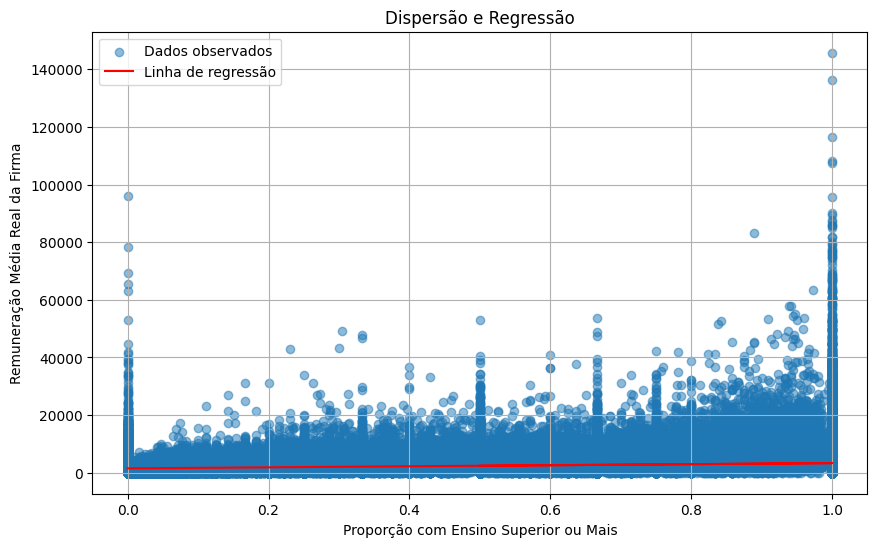

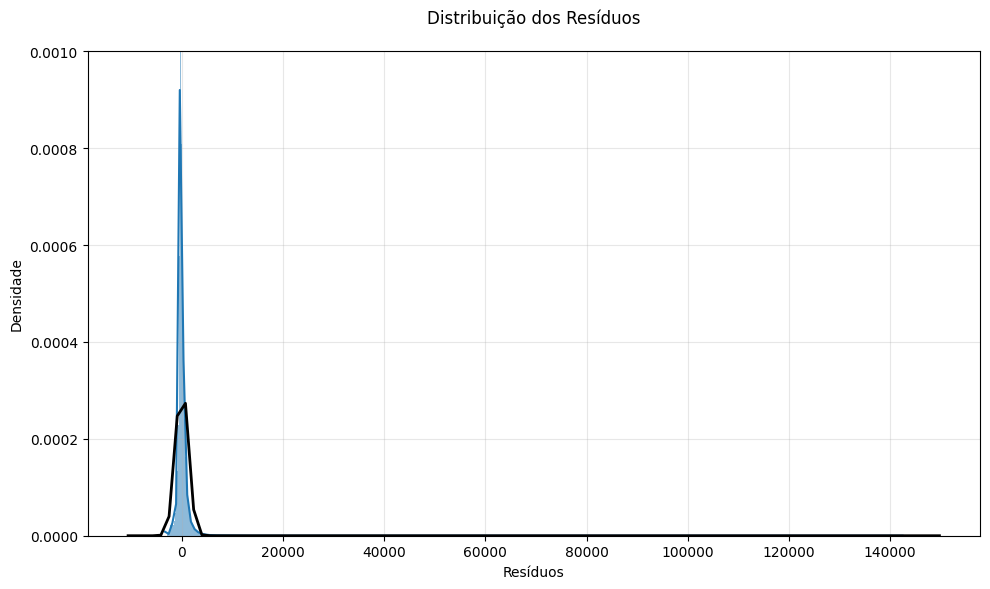

In [ ]:
# Selecionar variáveis e remover missing values

dados = df[['remun_med_real_med', 'superior_med']].dropna()
X = dados['superior_med']  # Variável independente
y = dados['remun_med_real_med']  # Variável dependente

# Adicionar constante (intercepto) ao modelo

X = sm.add_constant(X)  # X agora tem duas colunas: [const, Superior_med]

# Ajustar o modelo

modelo = sm.OLS(y, X).fit()

# Extrair resíduos e variáveis explicativas

residuos = modelo.resid
exog = modelo.model.exog  # Matriz de variáveis independentes (inclui constante)

# Realizar o teste de homocedasticidade

bp_test = het_breuschpagan(residuos, exog)
print("=== Teste de Breusch-Pagan ===")
print(f"Estatística LM: {bp_test[0]}")
print(f"p-valor: {bp_test[1]}")
print(f"F-estatística: {bp_test[2]}")
print(f"F p-valor: {bp_test[3]}")

# Ajustar o modelo (agora com erros-padrão robustos)

modelo = sm.OLS(y, X).fit(cov_type='HC3')

# Resultados da regressão
print(modelo.summary())

# 1) Calculando os betas de forma manual

# 1-1) Covariância específica

cov_xy = dados['remun_med_real_med'].cov(dados['superior_med'])
avg_x = np.var(dados['superior_med'])
print(f"\nCovariância entre X e Y: {cov_xy:.4f}\nA variância de X: {avg_x:.4f}")
print(f"\nO beta1: {cov_xy/avg_x:.5f}")

# 1-2) Calcular médias

mean_x = np.mean(dados['superior_med'])
print(mean_x)
mean_y = np.mean(y)
print(mean_y)
beta_0 = mean_y - (cov_xy/avg_x) * mean_x
print(f"O beta0: {beta_0:.5f}")

# Gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X['superior_med'], y, alpha=0.5, label='Dados observados')
plt.plot(X['superior_med'], modelo.predict(), color='red', label='Linha de regressão')
plt.title('Dispersão e Regressão')
plt.xlabel('Proporção com Ensino Superior ou Mais')
plt.ylabel('Remuneração Média Real da Firma')
plt.legend()
plt.grid(True)
plt.show()

# Dados do modelo
residuos = modelo.resid

# Configuração do gráfico
plt.figure(figsize=(10, 6))
ax = sns.histplot(residuos, kde=True, stat="density", linewidth=0)

# Adicionar curva normal
mu, std = stats.norm.fit(residuos)
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Ajustar limites do eixo Y
plt.ylim(0, 0.0010)  # Fixa o eixo Y entre 0 e 0.0010

# Configurações adicionais
plt.title('Distribuição dos Resíduos', pad=20)
plt.xlabel('Resíduos')
plt.ylabel('Densidade')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

#### remuneção média real da firma = const + idade média

=== Teste de Breusch-Pagan ===
Estatística LM: 1903.9311842697666
p-valor: 0.0
F-estatística: 1905.3380178388547
F p-valor: 0.0
                            OLS Regression Results                            
Dep. Variable:     remun_med_real_med   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                 2.846e+04
Date:                Sun, 08 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:00:53   Log-Likelihood:            -2.2115e+07
No. Observations:             2575873   AIC:                         4.423e+07
Df Residuals:                 2575871   BIC:                         4.423e+07
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---

/home/ph-padrim/Área de trabalho/Trabalho de Econometria/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


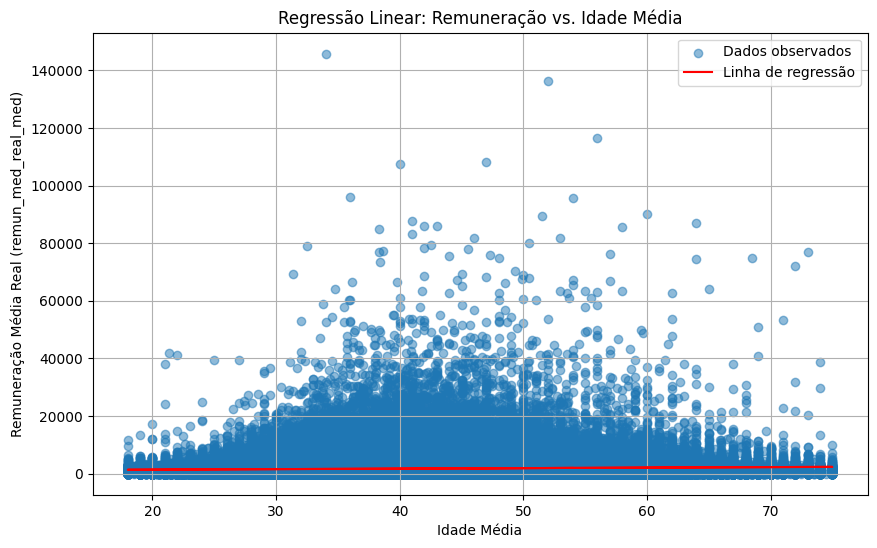

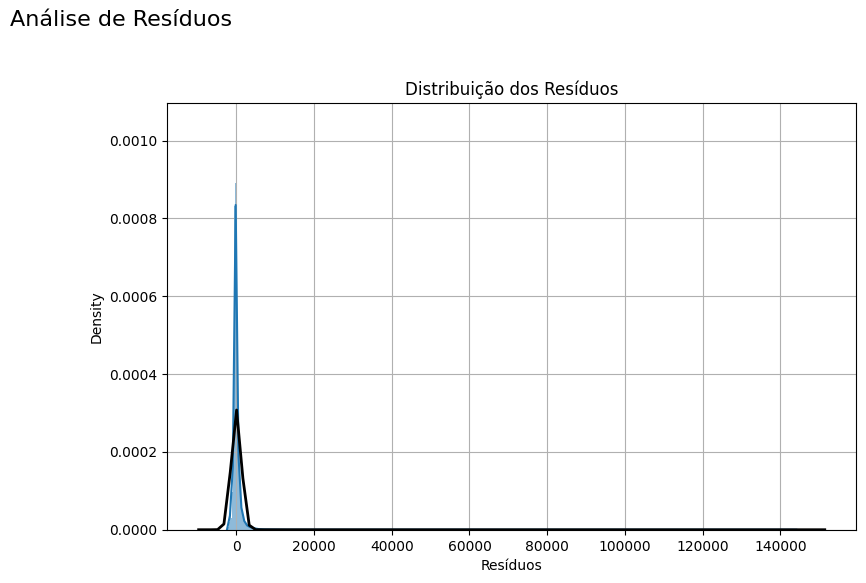

In [14]:
# Selecionar variáveis e remover missing values
dados = df[['remun_med_real_med', 'idade_med']].dropna()
X = dados['idade_med']  # Variável independente
y = dados['remun_med_real_med']  # Variável dependente

# Adicionar constante (intercepto) ao modelo
X = sm.add_constant(X)  # X agora tem duas colunas: [const, Superior_med]

# Ajustar o modelo

modelo = sm.OLS(y, X).fit()

# Extrair resíduos e variáveis explicativas

residuos = modelo.resid
exog = modelo.model.exog  # Matriz de variáveis independentes (inclui constante)

# Realizar o teste de homocedasticidade

bp_test = het_breuschpagan(residuos, exog)
print("=== Teste de Breusch-Pagan ===")
print(f"Estatística LM: {bp_test[0]}")
print(f"p-valor: {bp_test[1]}")
print(f"F-estatística: {bp_test[2]}")
print(f"F p-valor: {bp_test[3]}")

# Ajustar o modelo (com erro-padrão robustos)

modelo = sm.OLS(y, X).fit(cov_type='HC3')

# Resultados da regressão
print(modelo.summary())

# Gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X['idade_med'], y, alpha=0.5, label='Dados observados')
plt.plot(X['idade_med'], modelo.predict(), color='red', label='Linha de regressão')
plt.title('Regressão Linear: Remuneração vs. Idade Média')
plt.xlabel('Idade Média')
plt.ylabel('Remuneração Média Real (remun_med_real_med)')
plt.legend()
plt.grid(True)
plt.show()

# Dados do seu modelo
residuos = modelo.resid
valores_ajustados = modelo.predict()

# Configuração do layout dos gráficos
plt.figure(figsize=(15, 10))
plt.suptitle('Análise de Resíduos', y=1.02, fontsize=16)

# Gráfico 1: Histograma + Distribuição Normal
plt.subplot(2, 2, 2)
sns.histplot(residuos, kde=True, stat="density", linewidth=0)
mu, std = stats.norm.fit(residuos)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.grid(True)
plt.tight_layout()

plt.show()

#### remuneção média real da firma = const + idade média + proporção de ensino superior ou mais

=== Teste de Breusch-Pagan ===
Estatística LM: 20196.86435893221
p-valor: 0.0
F-estatística: 10178.225689616345
F p-valor: 0.0

=== VIF ===
const: VIF = 16.24157225873729
idade_med: VIF = 1.0006499192594023
superior_med: VIF = 1.000649919259376
                            OLS Regression Results                            
Dep. Variable:     remun_med_real_med   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                 2.372e+04
Date:                Sun, 08 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:08:50   Log-Likelihood:            -2.1969e+07
No. Observations:             2575873   AIC:                         4.394e+07
Df Residuals:                 2575870   BIC:                         4.394e+07
Df Model:                           2                                         
Covariance Type:                  HC3       

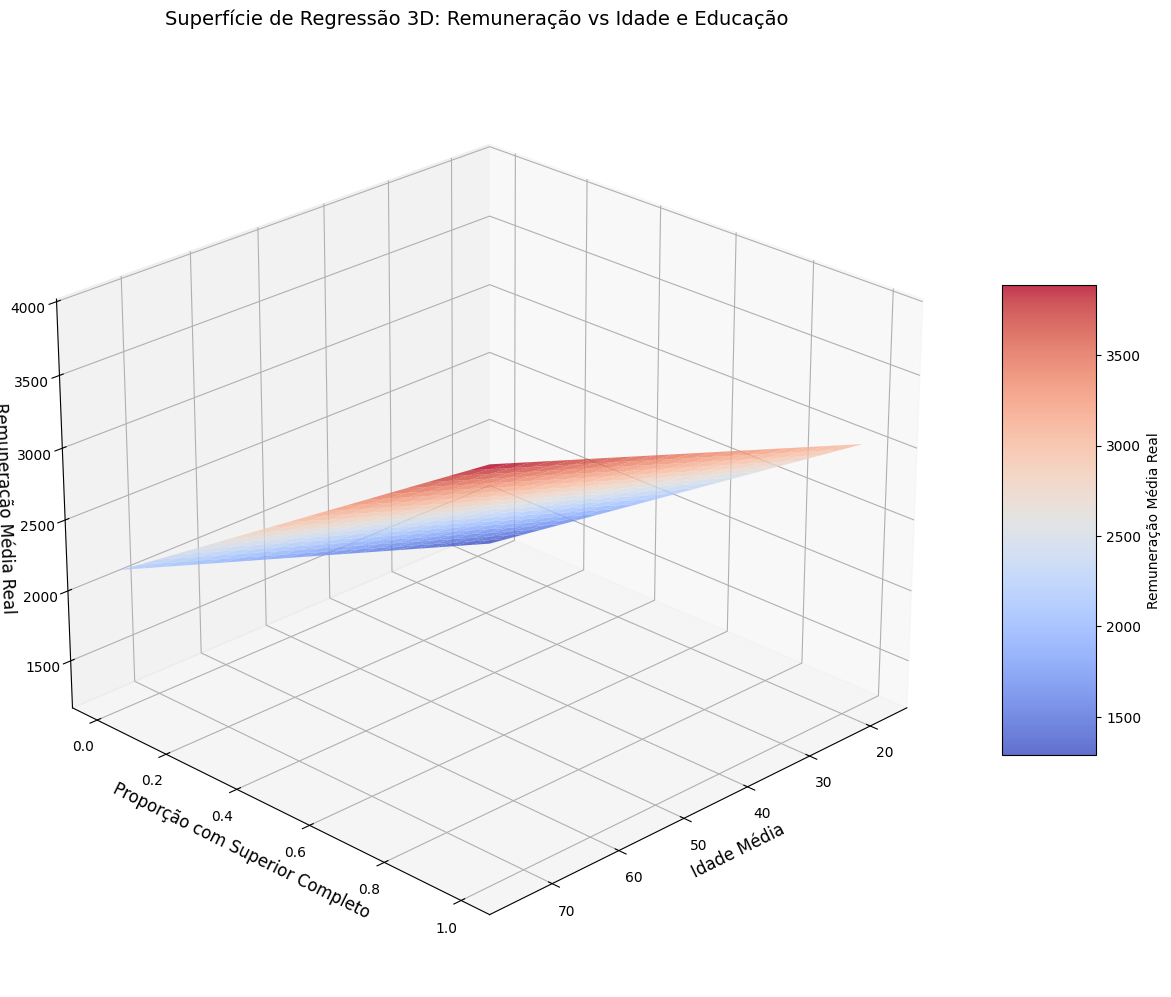

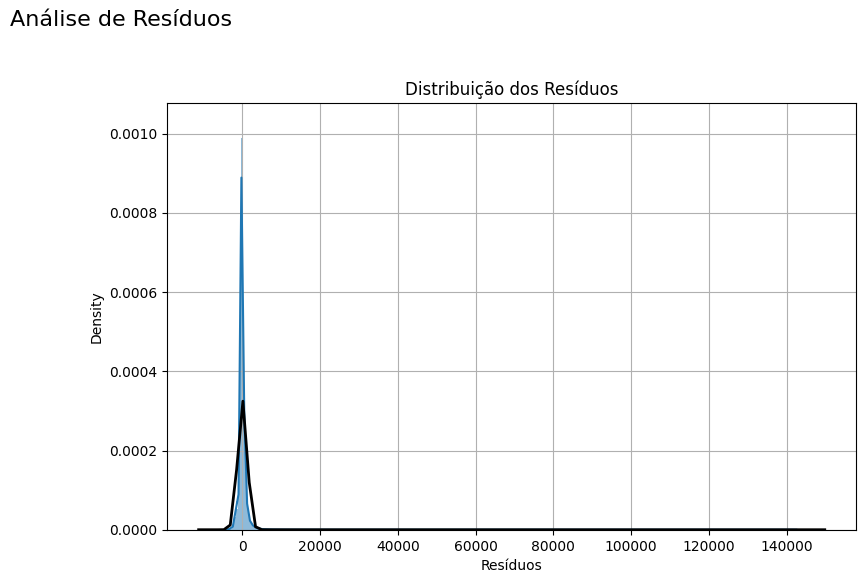

In [18]:
# Selecionar variáveis e remover missing values

dados = df[['remun_med_real_med', 'idade_med', 'superior_med']].dropna()
X = dados[['idade_med', 'superior_med']]  # Variáveis independentes
y = dados['remun_med_real_med']           # Variável dependente

# Adicionar constante (intercepto) ao modelo

X = sm.add_constant(X)

# Ajustar o modelo

modelo = sm.OLS(y, X).fit()

# Extrair resíduos e variáveis explicativas

residuos = modelo.resid
exog = modelo.model.exog  # Matriz de variáveis independentes (inclui constante)

# Realizar o teste de homocedasticidade 

bp_test = het_breuschpagan(residuos, exog)
print("=== Teste de Breusch-Pagan ===")
print(f"Estatística LM: {bp_test[0]}")
print(f"p-valor: {bp_test[1]}")
print(f"F-estatística: {bp_test[2]}")
print(f"F p-valor: {bp_test[3]}")

# Teste de multicolineariedade

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n=== VIF ===")
for i, col in enumerate(X.columns):
    print(f"{col}: VIF = {vif[i]}")

# Ajustar o modelo (com erros-padrão robustos)
modelo = sm.OLS(y, X).fit(cov_type='HC3')

# Resultados da regressão
print(modelo.summary())

# Preparar dados para a superfície
idade_range = np.linspace(dados['idade_med'].min(), dados['idade_med'].max(), 20)
superior_range = np.linspace(dados['superior_med'].min(), dados['superior_med'].max(), 20)
idade_grid, superior_grid = np.meshgrid(idade_range, superior_range)

# Criar matriz X para predição
X_pred = pd.DataFrame({
    'const': 1,
    'idade_med': idade_grid.ravel(),
    'superior_med': superior_grid.ravel()
})

# Prever valores
predicted = modelo.predict(X_pred).values.reshape(idade_grid.shape)

# Plotar APENAS a superfície de regressão
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Superfície da regressão com gradiente de cor
surface = ax.plot_surface(
    idade_grid,
    superior_grid,
    predicted,
    cmap=cm.coolwarm,  # Gradiente de cores
    alpha=0.8,
    linewidth=0,
    antialiased=True
)

# Barra de cores
fig.colorbar(surface, shrink=0.5, aspect=5, label='Remuneração Média Real')

# Configurações do gráfico
ax.set_xlabel('Idade Média', fontsize=12)
ax.set_ylabel('Proporção com Superior Completo', fontsize=12)
ax.set_zlabel('Remuneração Média Real', fontsize=12)
ax.set_title('Superfície de Regressão 3D: Remuneração vs Idade e Educação', fontsize=14, pad=20)

# Ajustar ângulo de visualização
ax.view_init(elev=25, azim=45)  # Elevação e rotação
plt.tight_layout()
plt.show()

# Dados do seu modelo
residuos = modelo.resid
valores_ajustados = modelo.predict()

# Configuração do layout dos gráficos
plt.figure(figsize=(15, 10))
plt.suptitle('Análise de Resíduos', y=1.02, fontsize=16)

# Gráfico 1: Histograma + Distribuição Normal
plt.subplot(2, 2, 2)
sns.histplot(residuos, kde=True, stat="density", linewidth=0)
mu, std = stats.norm.fit(residuos)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.grid(True)
plt.tight_layout()

plt.show()


#### remuneção média real da firma = const + idade média + proporção de ensino superior ou mais + (idade média)^2

=== Teste de Breusch-Pagan ===
Estatística LM: 20060.90433006333
p-valor: 0.0
F-estatística: 6739.4445341949495
F p-valor: 0.0

=== VIF ===
const: VIF = 160.1616790863692
idade_med: VIF = 37.695276834081014
superior_med: VIF = 1.0094219349377316
idade_med_quadrado: VIF = 37.67448084385924
                            OLS Regression Results                            
Dep. Variable:     remun_med_real_med   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                 3.277e+04
Date:                Sun, 08 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:12:31   Log-Likelihood:            -2.1962e+07
No. Observations:             2575873   AIC:                         4.392e+07
Df Residuals:                 2575869   BIC:                         4.392e+07
Df Model:                           3                                         

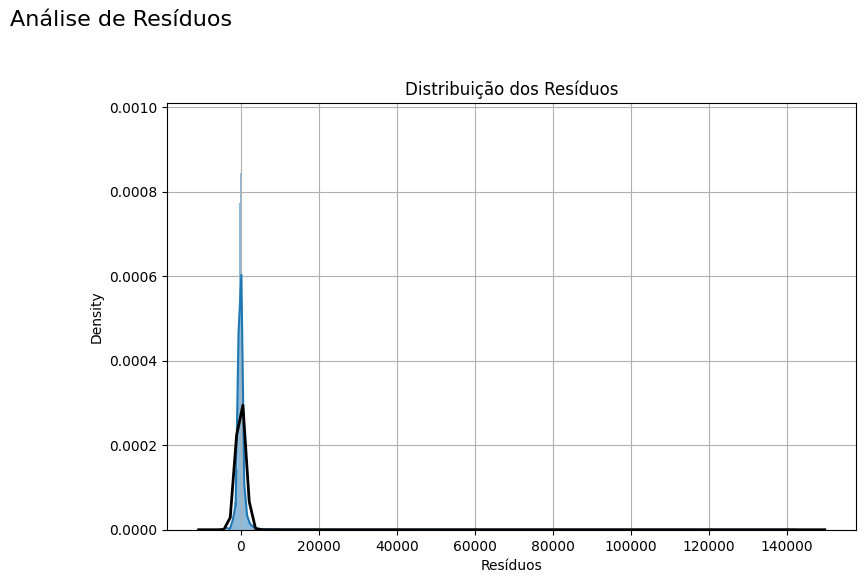

In [19]:
# Selecionar variáveis e remover missing values
dados = df[['remun_med_real_med', 'idade_med', 'superior_med', 'idade_med_quadrado']].dropna()
X = dados[['idade_med', 'superior_med', 'idade_med_quadrado']]  # Variáveis independentes
y = dados['remun_med_real_med']           # Variável dependente

# Adicionar constante (intercepto) ao modelo
X = sm.add_constant(X)

# Ajustar o modelo
modelo = sm.OLS(y, X).fit()

# Extrair resíduos e variáveis explicativas

residuos = modelo.resid
exog = modelo.model.exog  # Matriz de variáveis independentes (inclui constante)

# Realizar o teste de homocedasticidade 

bp_test = het_breuschpagan(residuos, exog)
print("=== Teste de Breusch-Pagan ===")
print(f"Estatística LM: {bp_test[0]}")
print(f"p-valor: {bp_test[1]}")
print(f"F-estatística: {bp_test[2]}")
print(f"F p-valor: {bp_test[3]}")

# Teste de multicolineariedade

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n=== VIF ===")
for i, col in enumerate(X.columns):
    print(f"{col}: VIF = {vif[i]}")

# Ajustar o modelo (com erros-padrão robustos)
modelo = sm.OLS(y, X).fit(cov_type='HC3')

# Resultados da regressão
print(modelo.summary())

# Dados do seu modelo
residuos = modelo.resid
valores_ajustados = modelo.predict()

# Configuração do layout dos gráficos
plt.figure(figsize=(15, 10))
plt.suptitle('Análise de Resíduos', y=1.02, fontsize=16)

# Gráfico 1: Histograma + Distribuição Normal
plt.subplot(2, 2, 2)
sns.histplot(residuos, kde=True, stat="density", linewidth=0)
mu, std = stats.norm.fit(residuos)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.grid(True)
plt.tight_layout()

plt.show()

#### remuneção média real da firma = const + idade média + proporção de ensino superior ou mais + (idade média)^2 + proporção do sexo feminino

=== Teste de Breusch-Pagan ===
Estatística LM: 21000.135417290705
p-valor: 0.0
F-estatística: 5293.176968504577
F p-valor: 0.0

=== VIF ===
const: VIF = 164.5957700152896
idade_med: VIF = 37.83671867762548
superior_med: VIF = 1.0343766614286893
idade_med_quadrado: VIF = 37.736802782047604
sexo_med: VIF = 1.0412258405821981
                            OLS Regression Results                            
Dep. Variable:     remun_med_real_med   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                 2.590e+04
Date:                Sun, 08 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:17:15   Log-Likelihood:            -2.1943e+07
No. Observations:             2575873   AIC:                         4.389e+07
Df Residuals:                 2575868   BIC:                         4.389e+07
Df Model:                           4      

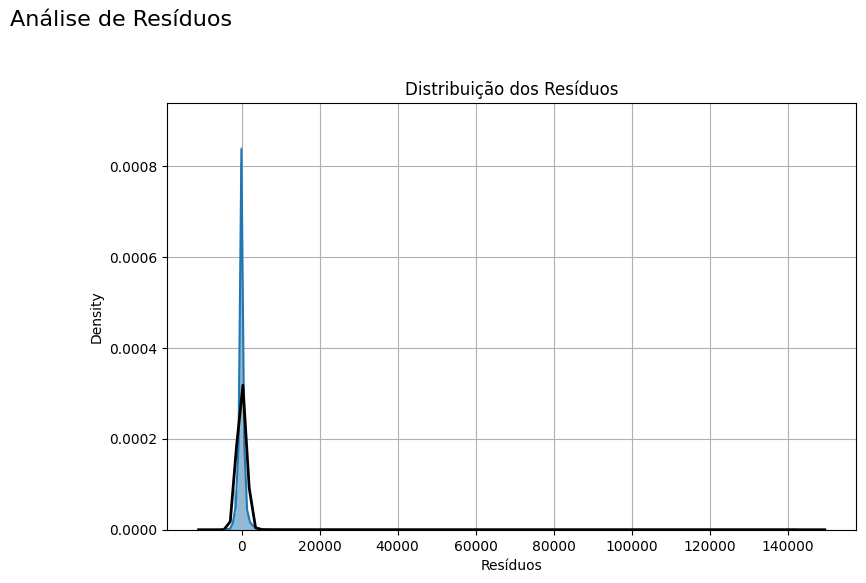

In [20]:
# Selecionar variáveis e remover missing values
dados = df[['remun_med_real_med', 'idade_med', 'superior_med', 'idade_med_quadrado', 'sexo_med']].dropna()
X = dados[['idade_med', 'superior_med', 'idade_med_quadrado', 'sexo_med']]  # Variáveis independentes
y = dados['remun_med_real_med']           # Variável dependente

# Adicionar constante (intercepto) ao modelo
X = sm.add_constant(X)

# Ajustar o modelo
modelo = sm.OLS(y, X).fit()

# Extrair resíduos e variáveis explicativas

residuos = modelo.resid
exog = modelo.model.exog  # Matriz de variáveis independentes (inclui constante)

# Realizar o teste de homocedasticidade 

bp_test = het_breuschpagan(residuos, exog)
print("=== Teste de Breusch-Pagan ===")
print(f"Estatística LM: {bp_test[0]}")
print(f"p-valor: {bp_test[1]}")
print(f"F-estatística: {bp_test[2]}")
print(f"F p-valor: {bp_test[3]}")

# Teste de multicolineariedade

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n=== VIF ===")
for i, col in enumerate(X.columns):
    print(f"{col}: VIF = {vif[i]}")

# Ajustar o modelo (com erros-padrão robustos)
modelo = sm.OLS(y, X).fit(cov_type='HC3')

# Resultados da regressão
print(modelo.summary())

# Dados do seu modelo
residuos = modelo.resid
valores_ajustados = modelo.predict()

# Configuração do layout dos gráficos
plt.figure(figsize=(15, 10))
plt.suptitle('Análise de Resíduos', y=1.02, fontsize=16)

# Gráfico 1: Histograma + Distribuição Normal
plt.subplot(2, 2, 2)
sns.histplot(residuos, kde=True, stat="density", linewidth=0)
mu, std = stats.norm.fit(residuos)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.grid(True)
plt.tight_layout()

plt.show()

#### remuneção média real da firma = const + idade média + proporção de ensino superior ou mais + (idade média)^2 + proporção do sexo feminino + proporção de raça parda, preta e indígena

=== Teste de Breusch-Pagan ===
Estatística LM: 18740.28643685442
p-valor: 0.0
F-estatística: 3780.2442543006405
F p-valor: 0.0

=== VIF ===
const: VIF = 174.9443340880681
idade_med: VIF = 38.488947572509446
superior_med: VIF = 1.0403639277726755
idade_med_quadrado: VIF = 38.41523027842742
sexo_med: VIF = 1.047823789875203
raca_cor_med: VIF = 1.0155823999946725
                            OLS Regression Results                            
Dep. Variable:     remun_med_real_med   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                 1.885e+04
Date:                Sun, 08 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:23:09   Log-Likelihood:            -1.8801e+07
No. Observations:             2200281   AIC:                         3.760e+07
Df Residuals:                 2200275   BIC:                         3.760e+07
Df Mo

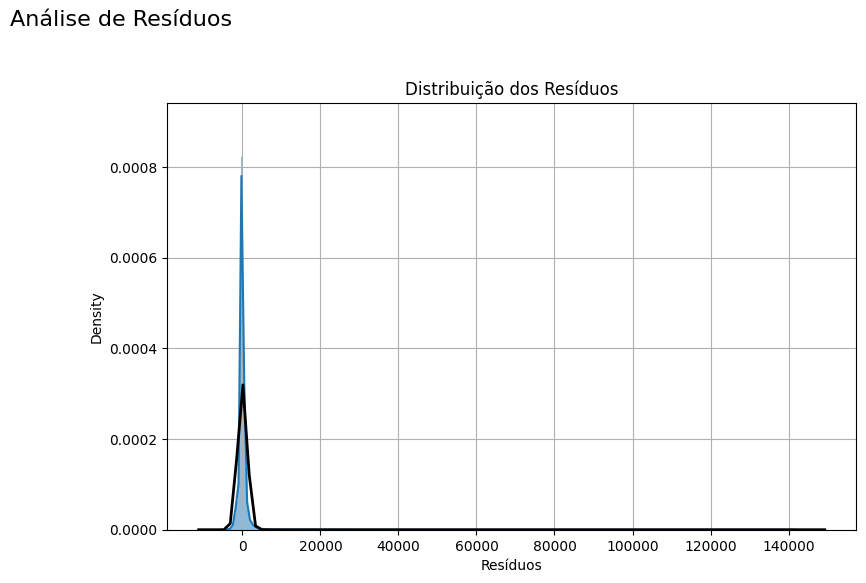

In [21]:
# Selecionar variáveis e remover missing values
dados = df[['remun_med_real_med', 'idade_med', 'superior_med', 'idade_med_quadrado', 'sexo_med', 'raca_cor_med']].dropna()
X = dados[['idade_med', 'superior_med', 'idade_med_quadrado', 'sexo_med', 'raca_cor_med']]  # Variáveis independentes
y = dados['remun_med_real_med']           # Variável dependente

# Adicionar constante (intercepto) ao modelo
X = sm.add_constant(X)

# Ajustar o modelo
modelo = sm.OLS(y, X).fit()

# Extrair resíduos e variáveis explicativas

residuos = modelo.resid
exog = modelo.model.exog  # Matriz de variáveis independentes (inclui constante)

# Realizar o teste de homocedasticidade 

bp_test = het_breuschpagan(residuos, exog)
print("=== Teste de Breusch-Pagan ===")
print(f"Estatística LM: {bp_test[0]}")
print(f"p-valor: {bp_test[1]}")
print(f"F-estatística: {bp_test[2]}")
print(f"F p-valor: {bp_test[3]}")

# Teste de multicolineariedade

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n=== VIF ===")
for i, col in enumerate(X.columns):
    print(f"{col}: VIF = {vif[i]}")

# Ajustar o modelo (com erros-padrão robustos)

modelo = sm.OLS(y, X).fit(cov_type='HC3')

# Resultados da regressão
print(modelo.summary())

# Dados do seu modelo
residuos = modelo.resid
valores_ajustados = modelo.predict()

# Configuração do layout dos gráficos
plt.figure(figsize=(15, 10))
plt.suptitle('Análise de Resíduos', y=1.02, fontsize=16)

# Gráfico 1: Histograma + Distribuição Normal
plt.subplot(2, 2, 2)
sns.histplot(residuos, kde=True, stat="density", linewidth=0)
mu, std = stats.norm.fit(residuos)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.grid(True)
plt.tight_layout()

plt.show()


#### remuneção média real da firma = const + idade média + proporção de ensino superior ou mais + (idade média)^2 + proporção do sexo feminino + proporção de raça parda, preta e indígena + (proporção do sexo feminino * proporção de raça parda, preta e indígena)

=== Teste de Breusch-Pagan ===
Estatística LM: 18850.709806973802
p-valor: 0.0
F-estatística: 3168.9244480478974
F p-valor: 0.0

=== VIF ===
const: VIF = 175.93176207629935
idade_med: VIF = 38.49249848757894
superior_med: VIF = 1.0403806124288688
idade_med_quadrado: VIF = 38.41787713072586
sexo_med: VIF = 1.8945683329276441
raca_cor_med: VIF = 2.2693800978294765
sexo_raca_interacao: VIF = 2.979754258293391
                            OLS Regression Results                            
Dep. Variable:     remun_med_real_med   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                 1.650e+04
Date:                Sun, 08 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:33:25   Log-Likelihood:            -1.8800e+07
No. Observations:             2200281   AIC:                         3.760e+07
Df Residuals:                 2200274

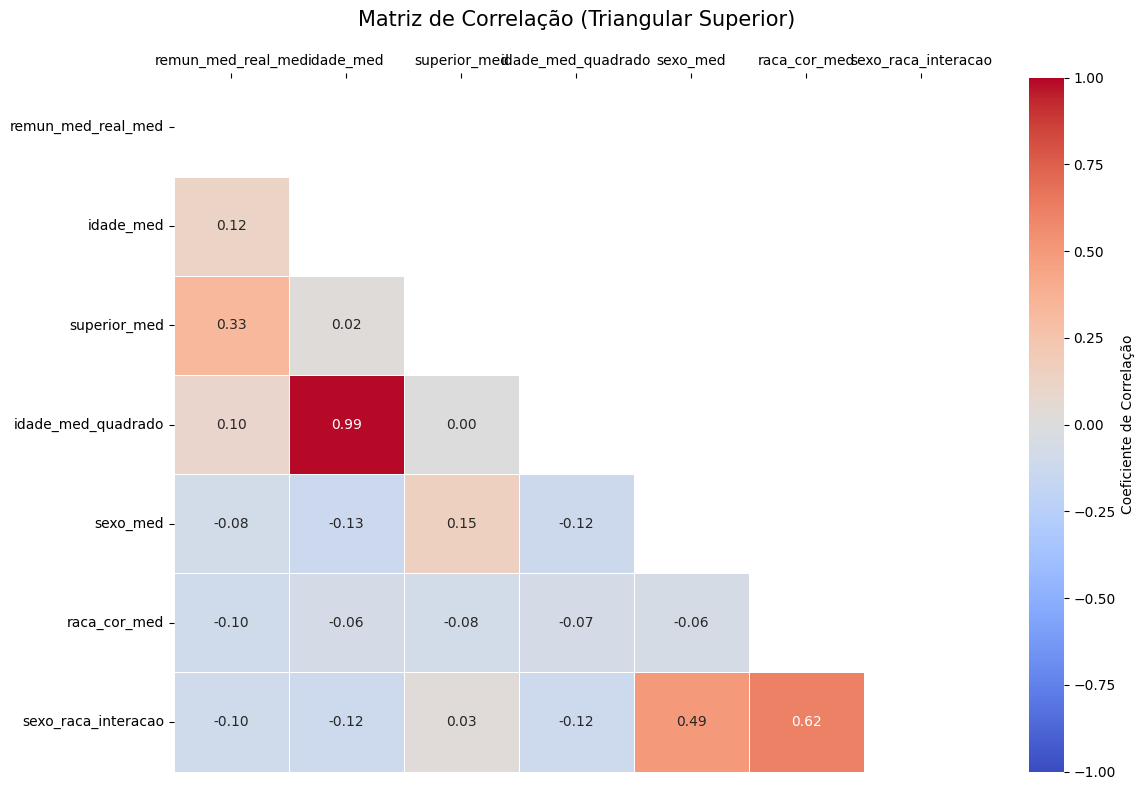


Top 5 correlações (em valor absoluto):
idade_med            idade_med_quadrado     0.986729
idade_med_quadrado   idade_med              0.986729
raca_cor_med         sexo_raca_interacao    0.616995
sexo_raca_interacao  raca_cor_med           0.616995
                     sexo_med               0.494601
dtype: float64


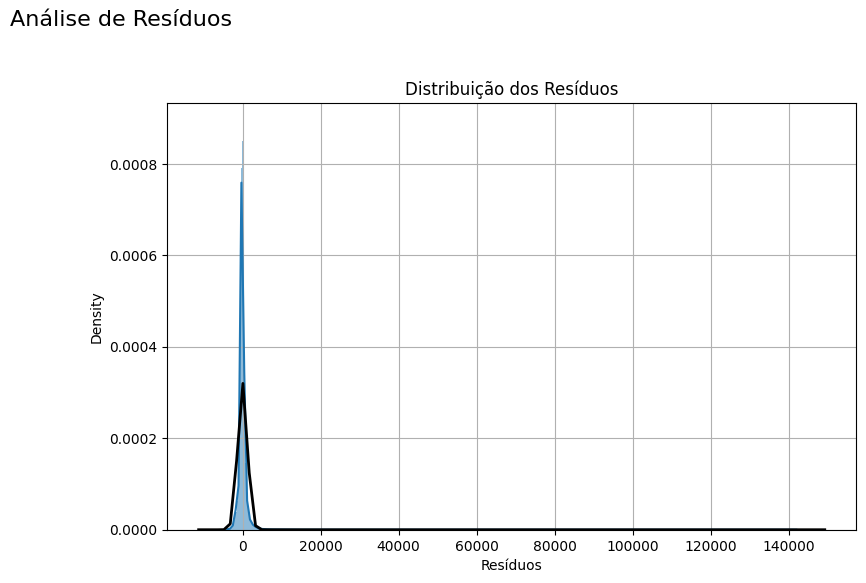

In [22]:
# Selecionar variáveis e remover missing values
dados = df[['remun_med_real_med', 'idade_med', 'superior_med', 'idade_med_quadrado', 'sexo_med', 'raca_cor_med', 'sexo_raca_interacao']].dropna()
X = dados[['idade_med', 'superior_med', 'idade_med_quadrado', 'sexo_med', 'raca_cor_med', 'sexo_raca_interacao']]  # Variáveis independentes
y = dados['remun_med_real_med']           # Variável dependente

# Adicionar constante (intercepto) ao modelo
X = sm.add_constant(X)

# Ajustar o modelo
modelo = sm.OLS(y, X).fit()

# Extrair resíduos e variáveis explicativas

residuos = modelo.resid
exog = modelo.model.exog  # Matriz de variáveis independentes (inclui constante)

# Realizar o teste de homocedasticidade 

bp_test = het_breuschpagan(residuos, exog)
print("=== Teste de Breusch-Pagan ===")
print(f"Estatística LM: {bp_test[0]}")
print(f"p-valor: {bp_test[1]}")
print(f"F-estatística: {bp_test[2]}")
print(f"F p-valor: {bp_test[3]}")

# Teste de multicolineariedade

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n=== VIF ===")
for i, col in enumerate(X.columns):
    print(f"{col}: VIF = {vif[i]}")

# Ajustar o modelo (com erros-padrão robustos)
modelo = sm.OLS(y, X).fit(cov_type='HC3')

# Resultados da regressão
print(modelo.summary())

# Selecionar as variáveis
dados = df[['remun_med_real_med', 'idade_med', 'superior_med', 'idade_med_quadrado', 'sexo_med', 'raca_cor_med', 'sexo_raca_interacao']].dropna()

# 1. Calcular a matriz de correlação
corr = dados.corr()

# 2. Criar máscara para mostrar apenas o triângulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(corr, 
            mask=mask,  # Aplicar máscara
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            vmin=-1, vmax=1,
            linewidths=0.5,
            cbar_kws={'label': 'Coeficiente de Correlação'})

# Ajustar título e labels
plt.title('Matriz de Correlação (Triangular Superior)', pad=20, fontsize=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Remover valores duplicados na diagonal
plt.gca().xaxis.tick_top()  # Mover labels para cima

plt.tight_layout()
# plt.savefig('corr_triangular.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

# 3. Opcional: Mostrar pares com maior correlação (absoluta)
print("\nTop 5 correlações (em valor absoluto):")
corr_unstack = corr.unstack().sort_values(key=lambda x: abs(x), ascending=False)
corr_unstack = corr_unstack[corr_unstack < 1]  # Remove autocorrelações
print(corr_unstack.head(5))

# Dados do seu modelo
residuos = modelo.resid
valores_ajustados = modelo.predict()

# Configuração do layout dos gráficos
plt.figure(figsize=(15, 10))
plt.suptitle('Análise de Resíduos', y=1.02, fontsize=16)

# Gráfico 1: Histograma + Distribuição Normal
plt.subplot(2, 2, 2)
sns.histplot(residuos, kde=True, stat="density", linewidth=0)
mu, std = stats.norm.fit(residuos)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.grid(True)
plt.tight_layout()

plt.show()

#### remuneção média real da firma = const + idade média + proporção de ensino superior ou mais + (idade média)^2 + proporção do sexo feminino + proporção de negros + (proporção do sexo feminino * proporção de raça parda, preta e indígena) + nivel_tec_1 + nivel_tec_2 + nivel_tec_3 + nivel_tec_4 + nivel_tec_5   

count    2.200281e+06
mean     7.129151e+00
std      1.714077e+00
min     -4.869056e+00
25%      7.087475e+00
50%      7.294755e+00
75%      7.546507e+00
max      1.188986e+01
Name: remun_med_real_med, dtype: float64
count    2.200281e+06
mean     1.724526e+03
std      1.347723e+03
min      0.000000e+00
25%      1.196874e+03
50%      1.472548e+03
75%      1.894106e+03
max      1.457806e+05
Name: remun_med_real_med, dtype: float64
=== Teste de Breusch-Pagan ===
Estatística LM: 40818.17992069308
p-valor: 0.0
F-estatística: 3780.8635083955846
F p-valor: 0.0

=== VIF ===
const: VIF = 176.74937168028498
idade_med: VIF = 38.53915106055489
superior_med: VIF = 1.0542331953829749
idade_med_quadrado: VIF = 38.445795805678934
sexo_med: VIF = 1.9703505725553048
raca_cor_med: VIF = 2.2727421916898147
sexo_raca_interacao: VIF = 2.980786676767541
nivel_tec_1: VIF = 1.2621653886856636
nivel_tec_2: VIF = 1.137650046606899
nivel_tec_3: VIF = 1.0546206676229843
nivel_tec_4: VIF = 1.0413242885529894
nivel

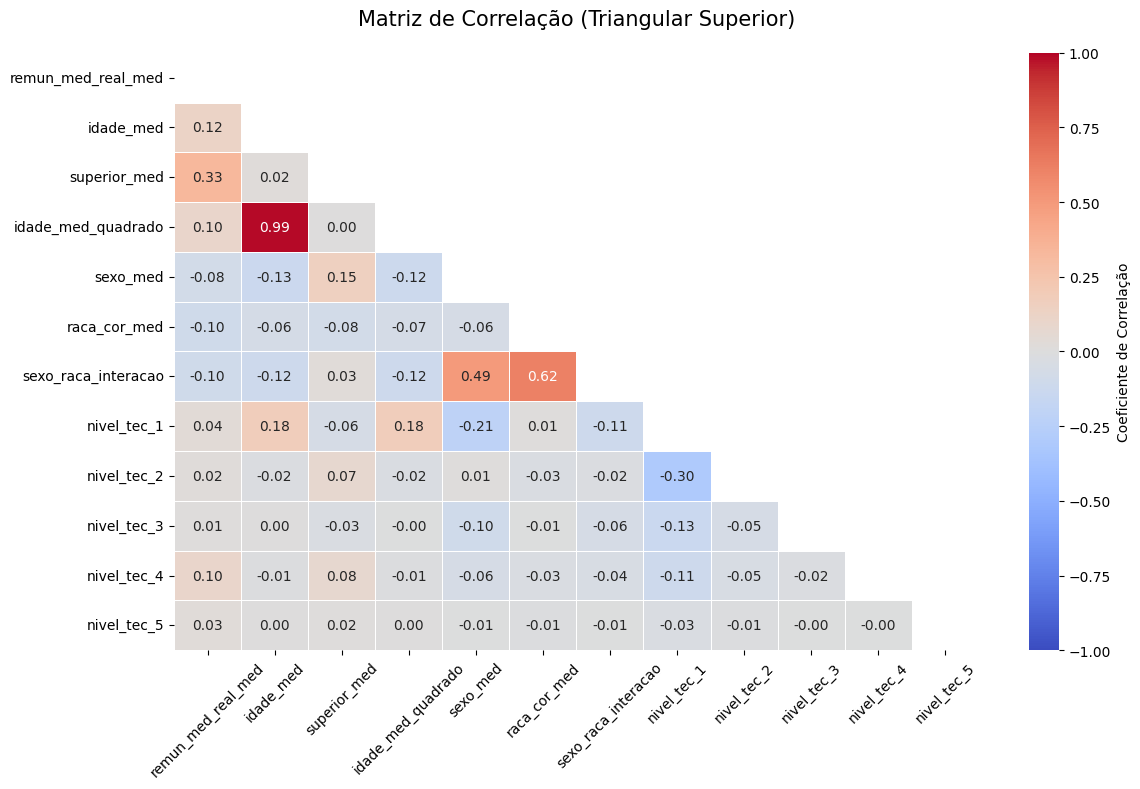

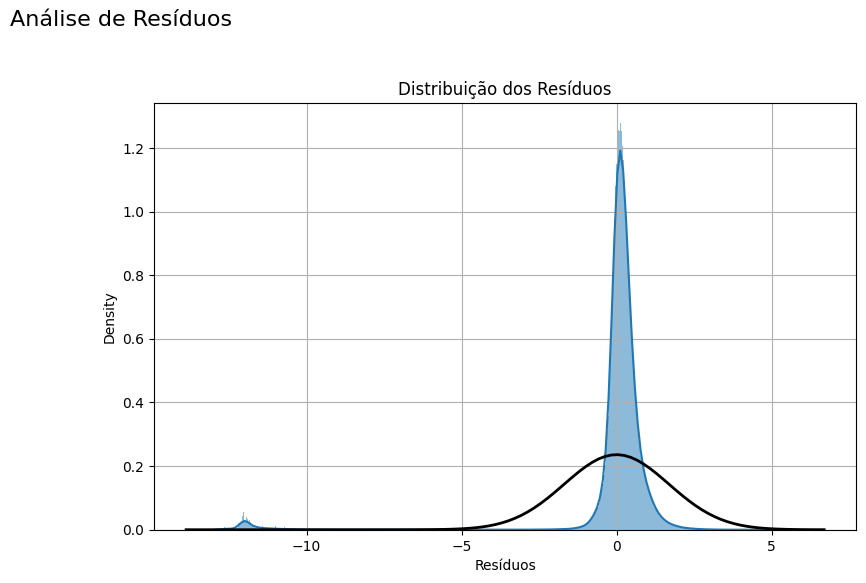

: 

In [ ]:
# Selecionar variáveis e remover missing values

dados = df[['remun_med_real_med', 'idade_med', 'superior_med', 'idade_med_quadrado', 'sexo_med', 'raca_cor_med', 'sexo_raca_interacao', 'nivel_tec_1', 'nivel_tec_2', 'nivel_tec_3', 'nivel_tec_4', 'nivel_tec_5']].dropna()
X = dados[['idade_med', 'superior_med', 'idade_med_quadrado', 'sexo_med', 'raca_cor_med', 'sexo_raca_interacao', 'nivel_tec_1', 'nivel_tec_2', 'nivel_tec_3', 'nivel_tec_4', 'nivel_tec_5']]  # Variáveis independentes
min_nao_zero = dados.loc[dados['remun_med_real_med'] > 0, 'remun_med_real_med'].min()
y_log = np.log(dados['remun_med_real_med'] + 0.01 * min_nao_zero) # Y logaritmizado
y = dados['remun_med_real_med'] # Y em nível

print(y_log.describe())
print(dados['remun_med_real_med'].describe())

# Adicionar constante (intercepto) ao modelo

X = sm.add_constant(X)

# Ajustar o modelo

modelo = sm.OLS(y_log, X).fit()

# Extrair resíduos e variáveis explicativas

residuos = modelo.resid
exog = modelo.model.exog  # Matriz de variáveis independentes (inclui constante)

# Realizar o teste de homocedasticidade 

bp_test = het_breuschpagan(residuos, exog)
print("=== Teste de Breusch-Pagan ===")
print(f"Estatística LM: {bp_test[0]}")
print(f"p-valor: {bp_test[1]}")
print(f"F-estatística: {bp_test[2]}")
print(f"F p-valor: {bp_test[3]}")

# Teste de multicolineariedade

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n=== VIF ===")
for i, col in enumerate(X.columns):
    print(f"{col}: VIF = {vif[i]}")

# Ajustar o modelo (com erros-padrão robustos)

modelo = sm.OLS(y_log, X).fit(cov_type='HC3')

# Resultados da regressão

print(modelo.summary())

# Calcular a matriz de correlação

corr = dados.corr()

# Criar máscara triangular superior

mask = np.triu(np.ones_like(corr, dtype=bool))

# Plotar o heatmap triangular

plt.figure(figsize=(12, 8))
sns.heatmap(corr, 
            mask=mask,  # Aplicar a máscara
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            vmin=-1, vmax=1,
            linewidths=0.5,
            cbar_kws={'label': 'Coeficiente de Correlação'})

# Ajustes estéticos

plt.title('Matriz de Correlação (Triangular Superior)', pad=20, fontsize=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
# plt.savefig('corr_triangular_completa.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

# Dados do seu modelo

residuos = modelo.resid
valores_ajustados = modelo.predict()

# Configuração do layout dos gráficos

plt.figure(figsize=(15, 10))
plt.suptitle('Análise de Resíduos', y=1.02, fontsize=16)

# Gráfico 1: Histograma + Distribuição Normal

plt.subplot(2, 2, 2)
sns.histplot(residuos, kde=True, stat="density", linewidth=0)
mu, std = stats.norm.fit(residuos)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.grid(True)
plt.tight_layout()
plt.show()